# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

print(type(api_key))

<class 'str'>


In [37]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [38]:
# Fetch the Bitcoin news articles
bit_articles = newsapi.get_everything(q="Bitcoin", language="en")

#Show sample bitcoin article
bit_articles["articles"][0]["content"]

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'

In [39]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="Ethereum", language="en")

In [40]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment =[]

for article in bit_articles["articles"]:
    try:
        text=article["content"]
        date=article["publishedAt"][:10]
        sentiment=analyzer.polarity_scores(text)
        compound=sentiment["compound"]
        pos=sentiment["pos"]
        neu=sentiment["neu"]
        neg=sentiment["neg"]
   ## Append to to Bitcoin sentiment list     
        bitcoin_sentiment.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
    except AttributeError:
        pass

#Create dataframe
bitcoin_df=pd.DataFrame(bitcoin_sentiment)

# Reorder dataframe columnns
columns = ["date","text","compound","positive","negative","neutral"]
bitcoin_df=bitcoin_df[columns]


# Display dataframe
bitcoin_df.head()


date                                               text  compound  \
0  2021-08-06  When my wife started a little garden in our ur...   -0.3400   
1  2021-08-23  PayPal will now allow users outside the U.S. t...    0.4215   
2  2021-08-10  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019   
3  2021-08-19  Retailers are increasingly accepting cryptocur...    0.6187   
4  2021-08-23  PayPal is bringing the ability to buy, hold an...    0.6908   

   positive  negative  neutral  
0     0.000     0.061    0.939  
1     0.098     0.000    0.902  
2     0.080     0.000    0.920  
3     0.153     0.000    0.847  
4     0.161     0.000    0.839

In [41]:

# Create the Bitcoin sentiment scores DataFrame
eth_sentiment =[]

for article in eth_articles["articles"]:
    try:
        text=article["content"]
        date=article["publishedAt"][:10]
        sentiment=analyzer.polarity_scores(text)
        compound=sentiment["compound"]
        pos=sentiment["pos"]
        neu=sentiment["neu"]
        neg=sentiment["neg"]
    #Append to Eth list    
        eth_sentiment.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
    except AttributeError:
        pass

#Create dataframe
eth_df=pd.DataFrame(eth_sentiment)

# Reorder dataframe columnns
columns = ["date","text","compound","positive","negative","neutral"]
eth_df=eth_df[columns]


#Display data 
eth_df.head()

date                                               text  compound  \
0  2021-08-05  Cent was founded in 2017 as an ad-free creator...    0.6956   
1  2021-08-23  PayPal will now allow users outside the U.S. t...    0.4215   
2  2021-08-23  PayPal is bringing the ability to buy, hold an...    0.6908   
3  2021-08-10  After the bell today, Coinbase reported anothe...    0.5719   
4  2021-08-05  Representation of the Ethereum virtual currenc...    0.0000   

   positive  negative  neutral  
0     0.190       0.0    0.810  
1     0.098       0.0    0.902  
2     0.161       0.0    0.839  
3     0.139       0.0    0.861  
4     0.000       0.0    1.000

In [42]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.162885   0.071100   0.033500   0.895400
std     0.447308   0.065972   0.068998   0.071897
min    -0.886000   0.000000   0.000000   0.729000
25%     0.000000   0.000000   0.000000   0.846000
50%     0.138950   0.066500   0.000000   0.904500
75%     0.525925   0.108250   0.043000   0.924750
max     0.718400   0.200000   0.271000   1.000000

In [43]:
# Describe the Ethereum Sentiment
eth_df.describe()

compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.138720   0.059850   0.026400   0.913700
std     0.394769   0.061361   0.072668   0.078868
min    -0.893400   0.000000   0.000000   0.688000
25%     0.000000   0.000000   0.000000   0.863250
50%     0.226300   0.053000   0.000000   0.922500
75%     0.426225   0.095000   0.000000   0.967750
max     0.695600   0.190000   0.312000   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive score. 

Q: Which coin had the highest compound score?

A: Ethereum also had the highest mean compound score., 

Q. Which coin had the highest positive score?

A: Ethereum also had the highest positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [45]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw=set(stopwords.words('english'))

# Expand the default stopwords list if necessary
extra_list=["chars","char","data","another","photo", "Joe","seen","dado","ha"]


In [46]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create stopwords
    sw=set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Remove the stop words and lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(extra_list)]
    
    return tokens

In [47]:
# Create a new tokens column for Bitcoin and display dataframe

bitcoin_df["tokens"]=bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

date                                               text  compound  \
0  2021-08-06  When my wife started a little garden in our ur...   -0.3400   
1  2021-08-23  PayPal will now allow users outside the U.S. t...    0.4215   
2  2021-08-10  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019   
3  2021-08-19  Retailers are increasingly accepting cryptocur...    0.6187   
4  2021-08-23  PayPal is bringing the ability to buy, hold an...    0.6908   

   positive  negative  neutral  \
0     0.000     0.061    0.939   
1     0.098     0.000    0.902   
2     0.080     0.000    0.920   
3     0.153     0.000    0.847   
4     0.161     0.000    0.839   

                                              tokens  
0  [wife, started, little, garden, urban, backyar...  
1  [paypal, allow, user, outside, us, buy, hold, ...  
2  [joe, raedlegetty, images, twitter, square, ce...  
3  [retailers, increasingly, accepting, cryptocur...  
4  [paypal, bringing, ability, buy, hold, sell, c...

In [48]:
# Create a new tokens column for Ethereum and display
eth_df["tokens"]=eth_df.text.apply(tokenizer)
eth_df.head()

date                                               text  compound  \
0  2021-08-05  Cent was founded in 2017 as an ad-free creator...    0.6956   
1  2021-08-23  PayPal will now allow users outside the U.S. t...    0.4215   
2  2021-08-23  PayPal is bringing the ability to buy, hold an...    0.6908   
3  2021-08-10  After the bell today, Coinbase reported anothe...    0.5719   
4  2021-08-05  Representation of the Ethereum virtual currenc...    0.0000   

   positive  negative  neutral  \
0     0.190       0.0    0.810   
1     0.098       0.0    0.902   
2     0.161       0.0    0.839   
3     0.139       0.0    0.861   
4     0.000       0.0    1.000   

                                              tokens  
0  [cent, wa, founded, adfree, creator, network, ...  
1  [paypal, allow, user, outside, us, buy, hold, ...  
2  [paypal, bringing, ability, buy, hold, sell, c...  
3  [bell, today, coinbase, reported, period, impr...  
4  [representation, ethereum, virtual, currency, ...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
#Import libraries

from collections import Counter
from nltk import ngrams

In [50]:
# Generate the Bitcoin N-grams where N=2
bitcoin_string= bitcoin_df.text.str.cat()
bitcoin_token=tokenizer(bitcoin_string)

bitcoin_bigram_counts=Counter(ngrams(bitcoin_token, n=2))
bitcoin_bigram_counts.most_common(10)

[(('buy', 'hold'), 3),
 (('hold', 'sell'), 3),
 (('charspaypal', 'allow'), 2),
 (('allow', 'user'), 2),
 (('first', 'time'), 2),
 (('allow', 'customer'), 2),
 (('sell', 'cryptocurrencies'), 2),
 (('charsby', 'joe'), 2),
 (('joe', 'tidycyber'), 2),
 (('tidycyber', 'reporter'), 2)]

In [51]:
# Generate the Ethereum N-grams where N=2
eth_string= eth_df.text.str.cat()
eth_token=tokenizer(eth_string)

# Most common bigrams
eth_bigram_counts=Counter(ngrams(eth_token, n=2))
eth_bigram_counts.most_common(10)

[(('pc', 'motherboard'), 3),
 (('motherboard', 'illustration'), 3),
 (('aug', 'reuters'), 3),
 (('cryptocurrency', 'heist'), 3),
 (('ether', 'burned'), 3),
 (('buy', 'hold'), 2),
 (('hold', 'sell'), 2),
 (('first', 'time'), 2),
 (('reached', 'billion'), 2),
 (('reutersdado', 'ruvicillustrationnew'), 2)]

In [52]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [53]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_token_count=token_count(bitcoin_token)
bitcoin_token_count


[('cryptocurrency', 10),
 ('first', 8),
 ('bitcoin', 8),
 ('customer', 5),
 ('reuters', 5),
 ('allow', 4),
 ('charspaypal', 3),
 ('buy', 3),
 ('hold', 3),
 ('sell', 3)]

In [54]:
# Use token_count to get the top 10 words for Ethereum
eth_token_count=token_count(eth_token)
eth_token_count

[('ethereum', 13),
 ('cryptocurrency', 7),
 ('network', 5),
 ('reuters', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('crypto', 4),
 ('wa', 3),
 ('us', 3),
 ('first', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [55]:
# Import libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [56]:
# Generate the Bitcoin word cloud
bit_cloud = " ".join(bitcoin_token)
wc=WordCloud().generate(bit_cloud)
plt.imshow(wc)

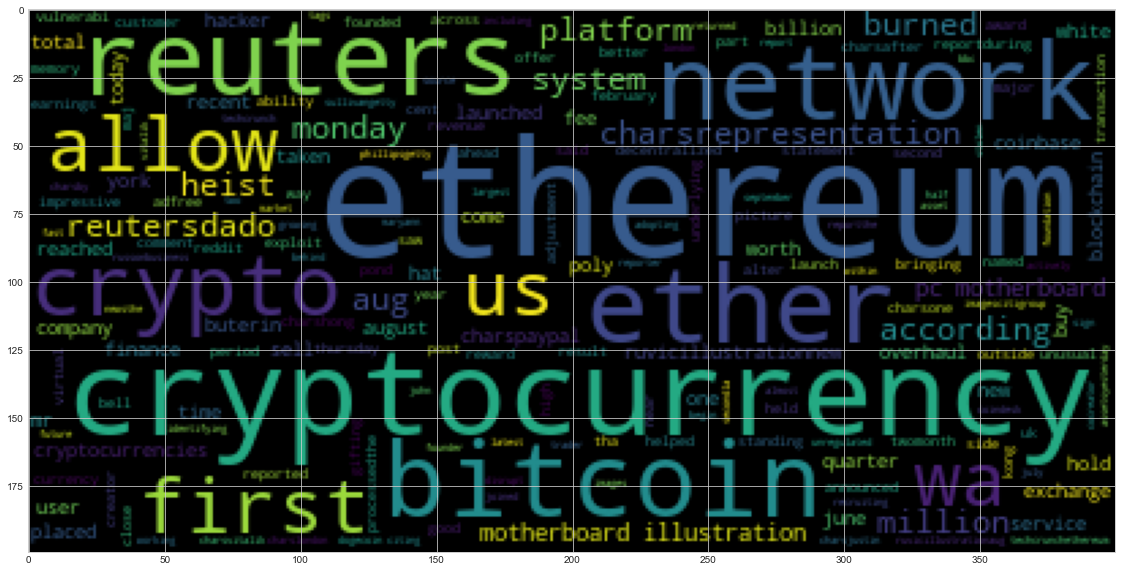

In [57]:
# Generate the Ethereum word cloud
eth_cloud = " ".join(eth_token)
wc=WordCloud().generate(eth_cloud)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [58]:
# Import libraries
import spacy
from spacy import displacy

In [59]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-08-30 16:50:28.454063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-08-30 16:50:28.454122: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [60]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [61]:
# Concatenate all of the Bitcoin text together
bitcoin_string= bitcoin_df.text.str.cat()

In [62]:
# Run the NER processor on all of the text
bitcoin_nlp=nlp(bitcoin_string)

# Add a title to the document
bitcoin_nlp.user_data["title"]="Bitcoin NER"

In [63]:
# Render the visualization
displacy.render(bitcoin_nlp, style="ent")

In [64]:
# List all Entities
bitcoin_entities=[ent.text for ent in bitcoin_nlp.ents]
bitcoin_entities




['U.S.',
 'first',
 'today',
 'U.K.',
 'Joe Raedle/',
 'Twitter',
 'Square',
 'Jack Dorsey',
 'Monday',
 'a year',
 'US',
 'Joe TidyCyber',
 'Chris',
 'almost 2,500',
 '2,100',
 'Chris',
 'Joe',
 'UK',
 'first',
 'four',
 'chars]T-Mobile',
 'two years',
 'roughly 49 million',
 '27',
 'Reuters',
 'first',
 'ATM',
 'Honduras',
 'this week',
 'El Salvador',
 'first',
 '27',
 'Reuters',
 'first',
 'ATM',
 'Honduras',
 'this week',
 'El Salvador',
 'first',
 'today',
 'Coinbase',
 'its second quarter',
 'the quarter',
 'Coinbase',
 '$2.23 billion',
 'first',
 '$311 billion',
 'Q2 2021',
 'Insider Intellige',
 'August 6, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationAug',
 '20',
 'Reuters',
 '5.01 %',
 '49,106.4',
 '22:04 GMT',
 'Friday',
 '+416 chars]T-Mobile',
 'Motherboard',
 '20, 2021',
 'PennyStocksBitcoin Price Surge Helped Boost',
 'Bitcoin, Dogecoin',
 'Ethereum',
 'T-Mobile',
 'Roughly 47.8 million',
 'June 7, 2021',
 'REUTERS',
 'Edgar Su/IllustrationAug',
 'Reuters',
 '7.07%',
 '47,

---

### Ethereum NER

In [65]:
# Concatenate all of the Ethereum text together
eth_string=eth_df.text.str.cat()

In [66]:
# Run the NER processor on all of the text
eth_nlp=nlp(eth_string)

# Add a title to the document
eth_nlp.user_data["title"]="Ethereum NER"

In [67]:
# Render the visualization
displacy.render(eth_nlp, style="ent")

In [68]:
# List all Entities
eth_entities=[ent.text for ent in eth_nlp.ents]
eth_entities

['2017',
 'Reddit',
 'Ethereum',
 'U.S.',
 'first',
 'today',
 'U.K.',
 'a year',
 'US',
 'today',
 'Coinbase',
 'its second quarter',
 'the quarter',
 'Coinbase',
 '$2.23 billion',
 'Ethereum',
 'February 3, 2018',
 'REUTERS',
 'Dado Ruvic',
 'Aug 5',
 'Reuters',
 'Monday',
 'Poly Network',
 'White',
 '+1513 chars]HONG KONG',
 'Aug 5',
 'Reuters',
 'two-month',
 'Thursday',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationAug 3',
 'Reuters',
 'Ethereum',
 'TechCrunch Disrupt London 2015',
 'John Phillips',
 'Vitalik Buterin',
 'Sullivan/Getty Images\r\nCitigroup',
 'CoinDesk',
 'two',
 'one',
 'BBC News',
 'almost half',
 '$600m',
 '433',
 'Yesterday',
 '25',
 'Reuters',
 'September',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic',
 'July 30',
 'Reuters',
 'second',
 'first',
 '$311 billion',
 'Q2 2021',
 'Insider Intellige',
 'above $100',
 'first',
 'Monday',
 'more than 200%',
 'August',
 'chars]More than $144 million',
 'August 5',
 'Sunday',
 'over 45

---